Github code link:
https://github.com/shoman8/Stat6289

In [1]:
from google.colab import drive
import sys
import os

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/Users/samuelhoman/Documents/STAT6289'

Mounted at /content/drive


In [1]:
import os
import torch
import tarfile
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn import datasets

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

superclasses = ('aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices', 
           'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 
           'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2')

classes = ('apples','aquarium fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottles','bowls','boy','bridge','bus','butterfly','camel','cans','castle','caterpillar',
           'cattle','chair','chimpanzee','clock','cloud','cockroach','computer keyboard','couch','crab','crocodile','cups','dinosaur','dolphin','elephant','flatfish','forest','fox',
           'girl','hamster','house','kangaroo','lamp','lawn-mower','leopard','lion','lizard','lobster','man','maple','motorcycle','mountain','mouse','mushrooms','oak','oranges','orchids',
           'otter','palm','pears','pickup truck','pine','plain','plates','poppies','porcupine','possum','rabbit','raccoon','ray','road','rocket','roses','sea','seal','shark','shrew','skunk',
           'skyscraper','snail','snake','spider','squirrel','streetcar','sunflowers','sweet peppers','table','tank','telephone','television','tiger','tractor','train','trout','tulips','turtle',
           'wardrobe','whale','willow','wolf','woman','worm')

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([4, 3, 32, 32])


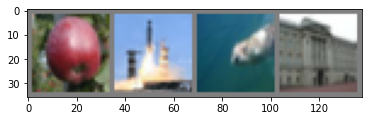

apples rocket otter castle


In [3]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
# Create a function that returns the accuracy of the model on the testing dataset.
def accuracy_function(model):

  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
  accuracy = (100* correct // total)
  return accuracy

In [5]:
# Relu CNN with no Drop Out
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))      
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net1 = Net1()

In [6]:
# ReLU
  # Learning Rate 0.001
net1_1 = net1
net1_2 = net1
net1_3 = net1
net1_4 = net1

  # Learning Rate 0.01
net2_1 = net1
net2_2 = net1
net2_3 = net1
net2_4 = net1

In [7]:
# Sigmoid CNN
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


net2 = Net2()

In [8]:
# Sigmoid Models
  # Learning Rate 0.001
net3_1 = net2
net3_2 = net2
net3_3 = net2
net3_4 = net2

  # Learning Rate 0.01
net4_1 = net2
net4_2 = net2
net4_3 = net2
net4_4 = net2

In [9]:
# Define Criterion
criterion = nn.CrossEntropyLoss()

# Define optimizers
# No dropout or data augmentation

# Four different optimizers: 
# 1. Stochastic Gradient Descent (SGD)
# 2. Averaged Stochastic Gradient Descent (ASGD)
# 3. Adam
# 4. Adam Max

# Two different learning rates:
# 1. 0.001
# 2. 0.01

# Two different activation functions:
# 1. ReLU
# 2. Sigmoid

# ReLU
  # Learning Rate 0.001
optimizer_net1_1 = optim.SGD(net1_1.parameters(), lr=0.001, momentum=0.9)
optimizer_net1_2 = optim.ASGD(net1_2.parameters(), lr=0.001)
optimizer_net1_3 = optim.Adam(net1_3.parameters(), lr=0.001)
optimizer_net1_4 = optim.Adamax(net1_4.parameters(), lr=0.001)

  # Learning Rate 0.01
optimizer_net2_1 = optim.SGD(net2_1.parameters(), lr=0.01, momentum=0.9)
optimizer_net2_2 = optim.ASGD(net2_2.parameters(), lr=0.01)
optimizer_net2_3 = optim.Adam(net2_3.parameters(), lr=0.01)
optimizer_net2_4 = optim.Adamax(net2_4.parameters(), lr=0.01)

# Sigmoid
  # Learning Rate 0.001
optimizer_net3_1 = optim.SGD(net3_1.parameters(), lr=0.001, momentum=0.9)
optimizer_net3_2 = optim.ASGD(net3_2.parameters(), lr=0.001)
optimizer_net3_3 = optim.Adam(net3_3.parameters(), lr=0.001)
optimizer_net3_4 = optim.Adamax(net3_4.parameters(), lr=0.001)

  # Learning Rate 0.01
optimizer_net4_1 = optim.SGD(net4_1.parameters(), lr=0.01, momentum=0.9)
optimizer_net4_2 = optim.ASGD(net4_2.parameters(), lr=0.01)
optimizer_net4_3 = optim.Adam(net4_3.parameters(), lr=0.01)
optimizer_net4_4 = optim.Adamax(net4_4.parameters(), lr=0.01)



In [11]:
# Train Model 1_1 - Relu CNN Activation Function - SGD Optimizer - Learning Rate 0.001
list_net1_1 = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net1_1.zero_grad()

        # forward + backward + optimize
        outputs = net1_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net1_1.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net1_1)

    list_net1_1.append(["Net1_1", epoch+1, accuracy, current_loss])


print('Finished Training')
list_net1_1

Accuracy of the network on the 10000 test images: 12 %
Accuracy of the network on the 10000 test images: 16 %
Accuracy of the network on the 10000 test images: 20 %
Accuracy of the network on the 10000 test images: 22 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 23 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy o

[['Net1_1', 1, 12, 3.796],
 ['Net1_1', 2, 16, 3.463],
 ['Net1_1', 3, 20, 3.261],
 ['Net1_1', 4, 22, 3.143],
 ['Net1_1', 5, 24, 3.043],
 ['Net1_1', 6, 24, 2.974],
 ['Net1_1', 7, 23, 2.936],
 ['Net1_1', 8, 26, 2.851],
 ['Net1_1', 9, 24, 2.839],
 ['Net1_1', 10, 25, 2.79],
 ['Net1_1', 11, 24, 2.772],
 ['Net1_1', 12, 25, 2.768],
 ['Net1_1', 13, 25, 2.716],
 ['Net1_1', 14, 25, 2.67],
 ['Net1_1', 15, 25, 2.678],
 ['Net1_1', 16, 25, 2.668],
 ['Net1_1', 17, 26, 2.602],
 ['Net1_1', 18, 24, 2.63],
 ['Net1_1', 19, 23, 2.586],
 ['Net1_1', 20, 23, 2.594]]

In [35]:
# Train Model 1_2 - Relu CNN Activation Function - ASGD Optimizer - Learning Rate 0.001
list_net1_2 = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net1_2.zero_grad()

        # forward + backward + optimize
        outputs = net1_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net1_2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net1_2)

    list_net1_2.append(["Net1_2", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net1_2

Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 13 %
Accuracy of the network on the 10000 test images: 15 %
Accuracy of the network on the 10000 test images: 17 %
Accuracy of the network on the 10000 test images: 19 %
Accuracy of the network on the 10000 test images: 19 %
Accuracy of the network on the 10000 test images: 20 %
Accuracy of the network on the 10000 test images: 21 %
Accuracy of the network on the 10000 test images: 23 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 28 %
Accuracy of the network on the 10000 test images: 28 %
Accuracy o

[['Net1_2', 1, 11, 3.864],
 ['Net1_2', 2, 13, 3.711],
 ['Net1_2', 3, 15, 3.599],
 ['Net1_2', 4, 17, 3.502],
 ['Net1_2', 5, 19, 3.401],
 ['Net1_2', 6, 19, 3.314],
 ['Net1_2', 7, 20, 3.25],
 ['Net1_2', 8, 21, 3.172],
 ['Net1_2', 9, 23, 3.131],
 ['Net1_2', 10, 24, 3.05],
 ['Net1_2', 11, 24, 3.003],
 ['Net1_2', 12, 25, 2.927],
 ['Net1_2', 13, 26, 2.895],
 ['Net1_2', 14, 26, 2.882],
 ['Net1_2', 15, 27, 2.845],
 ['Net1_2', 16, 26, 2.784],
 ['Net1_2', 17, 28, 2.748],
 ['Net1_2', 18, 28, 2.708],
 ['Net1_2', 19, 29, 2.689],
 ['Net1_2', 20, 30, 2.634]]

In [36]:
# Train Model 1_3 - Relu CNN Activation Function - Adam Optimizer - Learning Rate 0.001
list_net1_3 = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net1_3.zero_grad()

        # forward + backward + optimize
        outputs = net1_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net1_3.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net1_3)

    list_net1_3.append(["Net1_3", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net1_3

Accuracy of the network on the 10000 test images: 20 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 23 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 23 %
Accuracy of the network on the 10000 test images: 23 %
Accuracy of the network on the 10000 test images: 23 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 23 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 22 %
Accuracy of the network on the 10000 test images: 23 %
Accuracy of the network on the 10000 test images: 21 %
Accuracy o

[['Net1_3', 1, 20, 3.27],
 ['Net1_3', 2, 24, 3.099],
 ['Net1_3', 3, 23, 3.056],
 ['Net1_3', 4, 25, 2.97],
 ['Net1_3', 5, 26, 2.906],
 ['Net1_3', 6, 24, 2.886],
 ['Net1_3', 7, 25, 2.856],
 ['Net1_3', 8, 23, 2.857],
 ['Net1_3', 9, 23, 2.803],
 ['Net1_3', 10, 23, 2.76],
 ['Net1_3', 11, 24, 2.75],
 ['Net1_3', 12, 23, 2.756],
 ['Net1_3', 13, 25, 2.74],
 ['Net1_3', 14, 24, 2.725],
 ['Net1_3', 15, 24, 2.758],
 ['Net1_3', 16, 22, 2.751],
 ['Net1_3', 17, 23, 2.763],
 ['Net1_3', 18, 21, 2.732],
 ['Net1_3', 19, 24, 2.738],
 ['Net1_3', 20, 23, 2.726]]

In [37]:
# Train Model 1_4 - Relu CNN Activation Function - Adamax Optimizer - Learning Rate 0.001
list_net1_4 = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net1_4.zero_grad()

        # forward + backward + optimize
        outputs = net1_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net1_4.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net1_4)

    list_net1_4.append(["Net1_4", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net1_4

Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy o

[['Net1_4', 1, 26, 2.207],
 ['Net1_4', 2, 26, 2.11],
 ['Net1_4', 3, 26, 2.036],
 ['Net1_4', 4, 26, 2.022],
 ['Net1_4', 5, 26, 2.006],
 ['Net1_4', 6, 26, 1.998],
 ['Net1_4', 7, 26, 1.982],
 ['Net1_4', 8, 26, 1.958],
 ['Net1_4', 9, 26, 1.94],
 ['Net1_4', 10, 26, 1.921],
 ['Net1_4', 11, 26, 1.916],
 ['Net1_4', 12, 26, 1.884],
 ['Net1_4', 13, 26, 1.876],
 ['Net1_4', 14, 26, 1.868],
 ['Net1_4', 15, 26, 1.851],
 ['Net1_4', 16, 26, 1.836],
 ['Net1_4', 17, 25, 1.847],
 ['Net1_4', 18, 26, 1.779],
 ['Net1_4', 19, 25, 1.839],
 ['Net1_4', 20, 26, 1.802]]

In [ ]:
# Train Model 2_1 - Relu CNN Activation Function - SGD Optimizer - Learning Rate 0.01
list_net2_1 = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net2_1.zero_grad()

        # forward + backward + optimize
        outputs = net2_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net2_1.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net2_1)

    list_net2_1.append(["Net2_1", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net2_1

Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on t

In [13]:
list_net2_1

[['Net2_1', 1, 1, 4.612],
 ['Net2_1', 2, 1, 4.613],
 ['Net2_1', 3, 1, 4.598],
 ['Net2_1', 4, 1, 4.612],
 ['Net2_1', 5, 1, 4.613],
 ['Net2_1', 6, 1, 4.613],
 ['Net2_1', 7, 1, 4.613],
 ['Net2_1', 8, 1, 4.612],
 ['Net2_1', 9, 1, 4.612],
 ['Net2_1', 10, 1, 4.613],
 ['Net2_1', 11, 1, 4.611],
 ['Net2_1', 12, 1, 4.612],
 ['Net2_1', 13, 1, 4.612],
 ['Net2_1', 14, 1, 4.613],
 ['Net2_1', 15, 1, 4.612],
 ['Net2_1', 16, 1, 4.612],
 ['Net2_1', 17, 1, 4.612],
 ['Net2_1', 18, 1, 4.612],
 ['Net2_1', 19, 1, 4.611],
 ['Net2_1', 20, 1, 4.613]]

In [18]:
# Train Model 2_2 - Relu CNN Activation Function - ASGD Optimizer - Learning Rate 0.01
list_net2_2 = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net2_2.zero_grad()

        # forward + backward + optimize
        outputs = net2_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net2_2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net2_2)

    list_net2_2.append(["Net2_2", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net2_2

Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on t

[['Net2_2', 1, 1, 4.607],
 ['Net2_2', 2, 1, 4.607],
 ['Net2_2', 3, 1, 4.607],
 ['Net2_2', 4, 1, 4.606],
 ['Net2_2', 5, 1, 4.607],
 ['Net2_2', 6, 1, 4.607],
 ['Net2_2', 7, 1, 4.607],
 ['Net2_2', 8, 1, 4.606],
 ['Net2_2', 9, 1, 4.607],
 ['Net2_2', 10, 1, 4.606],
 ['Net2_2', 11, 1, 4.607],
 ['Net2_2', 12, 1, 4.606],
 ['Net2_2', 13, 1, 4.606],
 ['Net2_2', 14, 1, 4.606],
 ['Net2_2', 15, 1, 4.607],
 ['Net2_2', 16, 1, 4.606],
 ['Net2_2', 17, 1, 4.606],
 ['Net2_2', 18, 1, 4.606],
 ['Net2_2', 19, 1, 4.606],
 ['Net2_2', 20, 1, 4.606]]

In [20]:
# Train Model 2_3 - Relu CNN Activation Function - Adam Optimizer - Learning Rate 0.01
list_net2_3 = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net2_3.zero_grad()

        # forward + backward + optimize
        outputs = net2_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net2_3.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net2_3)

    list_net2_3.append(["Net2_3", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net2_3

Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on t

[['Net2_3', 1, 1, 4.618],
 ['Net2_3', 2, 1, 4.619],
 ['Net2_3', 3, 1, 4.62],
 ['Net2_3', 4, 1, 4.62],
 ['Net2_3', 5, 1, 4.617],
 ['Net2_3', 6, 1, 4.619],
 ['Net2_3', 7, 1, 4.618],
 ['Net2_3', 8, 1, 4.619],
 ['Net2_3', 9, 1, 4.618],
 ['Net2_3', 10, 1, 4.619],
 ['Net2_3', 11, 1, 4.619],
 ['Net2_3', 12, 1, 4.62],
 ['Net2_3', 13, 1, 4.618],
 ['Net2_3', 14, 1, 4.62],
 ['Net2_3', 15, 1, 4.617],
 ['Net2_3', 16, 1, 4.619],
 ['Net2_3', 17, 1, 4.619],
 ['Net2_3', 18, 1, 4.618],
 ['Net2_3', 19, 1, 4.617],
 ['Net2_3', 20, 1, 4.619]]

In [21]:
# Train Model 2_4 - Relu CNN Activation Function - Adamax Optimizer - Learning Rate 0.01
list_net2_4 = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net2_4.zero_grad()

        # forward + backward + optimize
        outputs = net2_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net2_4.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net2_4)

    list_net2_4.append(["Net2_4", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net2_4

Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on t

[['Net2_4', 1, 1, 4.609],
 ['Net2_4', 2, 1, 4.608],
 ['Net2_4', 3, 1, 4.608],
 ['Net2_4', 4, 1, 4.608],
 ['Net2_4', 5, 1, 4.609],
 ['Net2_4', 6, 1, 4.608],
 ['Net2_4', 7, 1, 4.609],
 ['Net2_4', 8, 1, 4.609],
 ['Net2_4', 9, 1, 4.608],
 ['Net2_4', 10, 1, 4.609],
 ['Net2_4', 11, 1, 4.609],
 ['Net2_4', 12, 1, 4.608],
 ['Net2_4', 13, 1, 4.609],
 ['Net2_4', 14, 1, 4.609],
 ['Net2_4', 15, 1, 4.609],
 ['Net2_4', 16, 1, 4.608],
 ['Net2_4', 17, 1, 4.609],
 ['Net2_4', 18, 1, 4.609],
 ['Net2_4', 19, 1, 4.608],
 ['Net2_4', 20, 1, 4.608]]

In [12]:
# Train Model 3_1 - Sigmoid Activation Function - SGD Optimizer - Learning Rate 0.001
list_net3_1 = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net3_1.zero_grad()

        # forward + backward + optimize
        outputs = net3_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net3_1.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net3_1)

    list_net3_1.append(["Net3_1", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net3_1

Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on t

[['Net3_1', 1, 1, 4.613],
 ['Net3_1', 2, 1, 4.611],
 ['Net3_1', 3, 1, 4.609],
 ['Net3_1', 4, 1, 4.608],
 ['Net3_1', 5, 1, 4.607],
 ['Net3_1', 6, 1, 4.607],
 ['Net3_1', 7, 1, 4.607],
 ['Net3_1', 8, 1, 4.607],
 ['Net3_1', 9, 1, 4.607],
 ['Net3_1', 10, 1, 4.607],
 ['Net3_1', 11, 1, 4.607],
 ['Net3_1', 12, 1, 4.607],
 ['Net3_1', 13, 1, 4.607],
 ['Net3_1', 14, 1, 4.607],
 ['Net3_1', 15, 1, 4.606],
 ['Net3_1', 16, 1, 4.606],
 ['Net3_1', 17, 1, 4.606],
 ['Net3_1', 18, 1, 4.606],
 ['Net3_1', 19, 0, 4.605],
 ['Net3_1', 20, 1, 4.604]]

In [13]:
# Train Model 3_2 - Sigmoid Activation Function - ASGD Optimizer - Learning Rate 0.001
list_net3_2 = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net3_2.zero_grad()

        # forward + backward + optimize
        outputs = net3_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net3_2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net3_2)

    list_net3_2.append(["Net3_2", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net3_2

Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 0 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 0 %
Accuracy of the network on the 10000 test images: 0 %
Accuracy of the network on the 10000 test images: 0 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 0 %
Accuracy of the network on the 10000 test images: 0 %
Accuracy of the network on t

[['Net3_2', 1, 1, 4.602],
 ['Net3_2', 2, 1, 4.602],
 ['Net3_2', 3, 1, 4.602],
 ['Net3_2', 4, 1, 4.601],
 ['Net3_2', 5, 1, 4.6],
 ['Net3_2', 6, 1, 4.6],
 ['Net3_2', 7, 1, 4.6],
 ['Net3_2', 8, 1, 4.599],
 ['Net3_2', 9, 0, 4.598],
 ['Net3_2', 10, 1, 4.597],
 ['Net3_2', 11, 0, 4.596],
 ['Net3_2', 12, 0, 4.595],
 ['Net3_2', 13, 0, 4.594],
 ['Net3_2', 14, 1, 4.594],
 ['Net3_2', 15, 1, 4.59],
 ['Net3_2', 16, 1, 4.588],
 ['Net3_2', 17, 0, 4.586],
 ['Net3_2', 18, 0, 4.582],
 ['Net3_2', 19, 1, 4.58],
 ['Net3_2', 20, 1, 4.572]]

In [14]:
# Train Model 3_3 - Sigmoid Activation Function - Adam Optimizer - Learning Rate 0.001
list_net3_3 = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net3_3.zero_grad()

        # forward + backward + optimize
        outputs = net3_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net3_3.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net3_3)

    list_net3_3.append(["Net3_3", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net3_3

Accuracy of the network on the 10000 test images: 7 %
Accuracy of the network on the 10000 test images: 12 %
Accuracy of the network on the 10000 test images: 14 %
Accuracy of the network on the 10000 test images: 17 %
Accuracy of the network on the 10000 test images: 19 %
Accuracy of the network on the 10000 test images: 20 %
Accuracy of the network on the 10000 test images: 21 %
Accuracy of the network on the 10000 test images: 23 %
Accuracy of the network on the 10000 test images: 24 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of the network on the 10000 test images: 28 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of

[['Net3_3', 1, 7, 4.073],
 ['Net3_3', 2, 12, 3.779],
 ['Net3_3', 3, 14, 3.623],
 ['Net3_3', 4, 17, 3.461],
 ['Net3_3', 5, 19, 3.35],
 ['Net3_3', 6, 20, 3.247],
 ['Net3_3', 7, 21, 3.136],
 ['Net3_3', 8, 23, 3.041],
 ['Net3_3', 9, 24, 2.987],
 ['Net3_3', 10, 25, 2.932],
 ['Net3_3', 11, 26, 2.802],
 ['Net3_3', 12, 25, 2.772],
 ['Net3_3', 13, 26, 2.683],
 ['Net3_3', 14, 26, 2.659],
 ['Net3_3', 15, 27, 2.63],
 ['Net3_3', 16, 28, 2.601],
 ['Net3_3', 17, 27, 2.554],
 ['Net3_3', 18, 27, 2.537],
 ['Net3_3', 19, 28, 2.517],
 ['Net3_3', 20, 28, 2.466]]

In [15]:
# Train Model 3_4 - Sigmoid Activation Function - Adamax Optimizer - Learning Rate 0.001
list_net3_4 = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net3_4.zero_grad()

        # forward + backward + optimize
        outputs = net3_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net3_4.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net3_4)

    list_net3_4.append(["Net3_4", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net3_4

Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 30 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 29 %
Accuracy o

[['Net3_4', 1, 29, 2.245],
 ['Net3_4', 2, 29, 2.2],
 ['Net3_4', 3, 29, 2.202],
 ['Net3_4', 4, 29, 2.189],
 ['Net3_4', 5, 29, 2.17],
 ['Net3_4', 6, 29, 2.193],
 ['Net3_4', 7, 29, 2.153],
 ['Net3_4', 8, 29, 2.148],
 ['Net3_4', 9, 29, 2.132],
 ['Net3_4', 10, 30, 2.168],
 ['Net3_4', 11, 29, 2.115],
 ['Net3_4', 12, 29, 2.125],
 ['Net3_4', 13, 29, 2.103],
 ['Net3_4', 14, 29, 2.098],
 ['Net3_4', 15, 29, 2.094],
 ['Net3_4', 16, 29, 2.129],
 ['Net3_4', 17, 29, 2.09],
 ['Net3_4', 18, 29, 2.109],
 ['Net3_4', 19, 29, 2.111],
 ['Net3_4', 20, 30, 2.084]]

In [25]:
# Train Model 4_1 - Sigmoid Activation Function - SGD Optimizer - Learning Rate 0.01
list_net4_1 = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net4_1.zero_grad()

        # forward + backward + optimize
        outputs = net4_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net4_1.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net4_1)

    list_net4_1.append(["Net4_1", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net4_1

Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 1 %
Accuracy of the network on the 10000 test images: 3 %
Accuracy of the network on the 10000 test images: 5 %
Accuracy of the network on the 10000 test images: 9 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 16 %
Accuracy of the network on the 10000 test images: 18 %
Accuracy of the network on the 10000 test images: 20 %
Accuracy of the network 

[['Net4_1', 1, 1, 4.612],
 ['Net4_1', 2, 1, 4.613],
 ['Net4_1', 3, 1, 4.611],
 ['Net4_1', 4, 1, 4.612],
 ['Net4_1', 5, 1, 4.613],
 ['Net4_1', 6, 1, 4.613],
 ['Net4_1', 7, 1, 4.612],
 ['Net4_1', 8, 1, 4.611],
 ['Net4_1', 9, 1, 4.612],
 ['Net4_1', 10, 1, 4.612],
 ['Net4_1', 11, 1, 4.603],
 ['Net4_1', 12, 3, 4.322],
 ['Net4_1', 13, 5, 4.135],
 ['Net4_1', 14, 9, 3.911],
 ['Net4_1', 15, 11, 3.705],
 ['Net4_1', 16, 16, 3.536],
 ['Net4_1', 17, 18, 3.369],
 ['Net4_1', 18, 20, 3.271],
 ['Net4_1', 19, 21, 3.169],
 ['Net4_1', 20, 22, 3.082]]

In [26]:
# Train Model 4_2 - Sigmoid Activation Function - ASGD Optimizer - Learning Rate 0.01
list_net4_2 = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net4_2.zero_grad()

        # forward + backward + optimize
        outputs = net4_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net4_2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net4_2)

    list_net4_2.append(["Net4_2", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net4_2

Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 25 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of the network on the 10000 test images: 28 %
Accuracy of the network on the 10000 test images: 28 %
Accuracy of the network on the 10000 test images: 28 %
Accuracy of the network on the 10000 test images: 28 %
Accuracy of the network on the 10000 test images: 28 %
Accuracy of the network on the 10000 test images: 28 %
Accuracy o

[['Net4_2', 1, 25, 2.846],
 ['Net4_2', 2, 25, 2.841],
 ['Net4_2', 3, 26, 2.801],
 ['Net4_2', 4, 26, 2.806],
 ['Net4_2', 5, 26, 2.765],
 ['Net4_2', 6, 26, 2.774],
 ['Net4_2', 7, 26, 2.748],
 ['Net4_2', 8, 27, 2.743],
 ['Net4_2', 9, 27, 2.718],
 ['Net4_2', 10, 27, 2.683],
 ['Net4_2', 11, 27, 2.712],
 ['Net4_2', 12, 27, 2.7],
 ['Net4_2', 13, 28, 2.708],
 ['Net4_2', 14, 28, 2.705],
 ['Net4_2', 15, 28, 2.678],
 ['Net4_2', 16, 28, 2.65],
 ['Net4_2', 17, 28, 2.669],
 ['Net4_2', 18, 28, 2.646],
 ['Net4_2', 19, 28, 2.633],
 ['Net4_2', 20, 29, 2.633]]

In [27]:
# Train Model 4_3 - Sigmoid Activation Function - Adam Optimizer - Learning Rate 0.01
list_net4_3 = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net4_3.zero_grad()

        # forward + backward + optimize
        outputs = net4_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net4_3.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net4_3)

    list_net4_3.append(["Net4_3", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net4_3

Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 6 %
Accuracy of the network on the 10000 test images: 9 %
Accuracy of the network on the 10000 test images: 8 %
Accuracy of the network on the 10000 test images: 8 %
Accuracy of the network on the 10000 test images: 8 %
Accuracy of the network on the 10000 test images: 8 %
Accuracy of the network on the 10000 test images: 6 %
Accuracy of the network on the 10000 test images: 8 %
Accuracy of the network on the 10000 test images: 9 %
Accuracy of the network on the 10000 test images: 8 %
Accuracy of the network on the 10000 test images: 8 %
Accuracy of the network on the 10000 test images: 6 %
Accuracy of the network on the 10000 test images: 7 %
Accuracy of the network on the 10000 test images: 6 %
Accuracy of the network on the 10000 test images: 6 %
Accuracy of the network on the 10000 test images: 7 %
Accuracy of the network on the 10000 test images: 7 %
Accuracy of the network on 

[['Net4_3', 1, 10, 3.892],
 ['Net4_3', 2, 6, 3.925],
 ['Net4_3', 3, 9, 3.957],
 ['Net4_3', 4, 8, 4.088],
 ['Net4_3', 5, 8, 3.994],
 ['Net4_3', 6, 8, 3.932],
 ['Net4_3', 7, 8, 3.974],
 ['Net4_3', 8, 6, 4.056],
 ['Net4_3', 9, 8, 3.968],
 ['Net4_3', 10, 9, 3.988],
 ['Net4_3', 11, 8, 4.008],
 ['Net4_3', 12, 8, 4.038],
 ['Net4_3', 13, 6, 4.116],
 ['Net4_3', 14, 7, 4.143],
 ['Net4_3', 15, 6, 4.106],
 ['Net4_3', 16, 6, 4.097],
 ['Net4_3', 17, 7, 4.039],
 ['Net4_3', 18, 7, 4.074],
 ['Net4_3', 19, 7, 4.011],
 ['Net4_3', 20, 7, 4.111]]

In [28]:
# Train Model 4_4 - Sigmoid Activation Function - Adamax Optimizer - Learning Rate 0.01
list_net4_4 = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net4_4.zero_grad()

        # forward + backward + optimize
        outputs = net4_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net4_4.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            current_loss = round(running_loss / 2000, 3)
            running_loss = 0.0

    accuracy = accuracy_function(net4_4)

    list_net4_4.append(["Net4_4", epoch+1, accuracy, current_loss])

print('Finished Training')
list_net4_4

Accuracy of the network on the 10000 test images: 9 %
Accuracy of the network on the 10000 test images: 9 %
Accuracy of the network on the 10000 test images: 9 %
Accuracy of the network on the 10000 test images: 9 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of the network on the 10000 test images: 11 %
Accuracy of th

[['Net4_4', 1, 9, 3.92],
 ['Net4_4', 2, 9, 3.907],
 ['Net4_4', 3, 9, 3.89],
 ['Net4_4', 4, 9, 3.86],
 ['Net4_4', 5, 10, 3.839],
 ['Net4_4', 6, 10, 3.836],
 ['Net4_4', 7, 10, 3.798],
 ['Net4_4', 8, 10, 3.804],
 ['Net4_4', 9, 11, 3.788],
 ['Net4_4', 10, 11, 3.783],
 ['Net4_4', 11, 11, 3.777],
 ['Net4_4', 12, 11, 3.756],
 ['Net4_4', 13, 11, 3.738],
 ['Net4_4', 14, 11, 3.751],
 ['Net4_4', 15, 11, 3.728],
 ['Net4_4', 16, 11, 3.75],
 ['Net4_4', 17, 11, 3.736],
 ['Net4_4', 18, 11, 3.713],
 ['Net4_4', 19, 11, 3.715],
 ['Net4_4', 20, 12, 3.672]]

In [38]:
# Save results lists manually to protect from crashes.

# ReLU 0.001
list_net1_1 = [['Net1_1', 1, 12, 3.796],['Net1_1', 2, 16, 3.463],['Net1_1', 3, 20, 3.261],['Net1_1', 4, 22, 3.143],['Net1_1', 5, 24, 3.043],['Net1_1', 6, 24, 2.974],['Net1_1', 7, 23, 2.936],['Net1_1', 8, 26, 2.851],['Net1_1', 9, 24, 2.839],
              ['Net1_1', 10, 25, 2.79],['Net1_1', 11, 24, 2.772],['Net1_1', 12, 25, 2.768],['Net1_1', 13, 25, 2.716],['Net1_1', 14, 25, 2.67],['Net1_1', 15, 25, 2.678],['Net1_1', 16, 25, 2.668],['Net1_1', 17, 26, 2.602],['Net1_1', 18, 24, 2.63],['Net1_1', 19, 23, 2.586],['Net1_1', 20, 23, 2.594]]
list_net1_2 = [['Net1_2', 1, 11, 3.864],['Net1_2', 2, 13, 3.711],['Net1_2', 3, 15, 3.599],['Net1_2', 4, 17, 3.502],['Net1_2', 5, 19, 3.401],['Net1_2', 6, 19, 3.314],['Net1_2', 7, 20, 3.25],['Net1_2', 8, 21, 3.172],['Net1_2', 9, 23, 3.131],['Net1_2', 10, 24, 3.05],
              ['Net1_2', 11, 24, 3.003],['Net1_2', 12, 25, 2.927],['Net1_2', 13, 26, 2.895],['Net1_2', 14, 26, 2.882],['Net1_2', 15, 27, 2.845],['Net1_2', 16, 26, 2.784],['Net1_2', 17, 28, 2.748],['Net1_2', 18, 28, 2.708],['Net1_2', 19, 29, 2.689],['Net1_2', 20, 30, 2.634]]
list_net1_3 = [['Net1_3', 1, 20, 3.27],['Net1_3', 2, 24, 3.099],['Net1_3', 3, 23, 3.056],['Net1_3', 4, 25, 2.97],['Net1_3', 5, 26, 2.906],['Net1_3', 6, 24, 2.886],['Net1_3', 7, 25, 2.856],['Net1_3', 8, 23, 2.857],['Net1_3', 9, 23, 2.803],['Net1_3', 10, 23, 2.76],
              ['Net1_3', 11, 24, 2.75],['Net1_3', 12, 23, 2.756],['Net1_3', 13, 25, 2.74],['Net1_3', 14, 24, 2.725],['Net1_3', 15, 24, 2.758],['Net1_3', 16, 22, 2.751],['Net1_3', 17, 23, 2.763],['Net1_3', 18, 21, 2.732],['Net1_3', 19, 24, 2.738],['Net1_3', 20, 23, 2.726]] 
list_net1_4 = [['Net1_4', 1, 26, 2.207],['Net1_4', 2, 26, 2.11],['Net1_4', 3, 26, 2.036],['Net1_4', 4, 26, 2.022],['Net1_4', 5, 26, 2.006],['Net1_4', 6, 26, 1.998],['Net1_4', 7, 26, 1.982],['Net1_4', 8, 26, 1.958],['Net1_4', 9, 26, 1.94],
              ['Net1_4', 10, 26, 1.921],['Net1_4', 11, 26, 1.916],['Net1_4', 12, 26, 1.884],['Net1_4', 13, 26, 1.876],['Net1_4', 14, 26, 1.868],['Net1_4', 15, 26, 1.851],['Net1_4', 16, 26, 1.836],['Net1_4', 17, 25, 1.847],['Net1_4', 18, 26, 1.779],['Net1_4', 19, 25, 1.839],['Net1_4', 20, 26, 1.802]]

# ReLU 0.01
list_net2_1 = [['Net2_1', 1, 1, 4.612],['Net2_1', 2, 1, 4.613],['Net2_1', 3, 1, 4.598],['Net2_1', 4, 1, 4.612],['Net2_1', 5, 1, 4.613],['Net2_1', 6, 1, 4.613],['Net2_1', 7, 1, 4.613],['Net2_1', 8, 1, 4.612],['Net2_1', 9, 1, 4.612],['Net2_1', 10, 1, 4.613],
              ['Net2_1', 11, 1, 4.611],['Net2_1', 12, 1, 4.612],['Net2_1', 13, 1, 4.612],['Net2_1', 14, 1, 4.613],['Net2_1', 15, 1, 4.612],['Net2_1', 16, 1, 4.612],['Net2_1', 17, 1, 4.612],['Net2_1', 18, 1, 4.612],['Net2_1', 19, 1, 4.611],['Net2_1', 20, 1, 4.613]]
list_net2_2 = [['Net2_2', 1, 1, 4.607],['Net2_2', 2, 1, 4.607],['Net2_2', 3, 1, 4.607],['Net2_2', 4, 1, 4.606],['Net2_2', 5, 1, 4.607],['Net2_2', 6, 1, 4.607],['Net2_2', 7, 1, 4.607],['Net2_2', 8, 1, 4.606],['Net2_2', 9, 1, 4.607],['Net2_2', 10, 1, 4.606],
              ['Net2_2', 11, 1, 4.607],['Net2_2', 12, 1, 4.606],['Net2_2', 13, 1, 4.606],['Net2_2', 14, 1, 4.606],['Net2_2', 15, 1, 4.607],['Net2_2', 16, 1, 4.606],['Net2_2', 17, 1, 4.606],['Net2_2', 18, 1, 4.606],['Net2_2', 19, 1, 4.606],['Net2_2', 20, 1, 4.606]]
list_net2_3 = [['Net2_3', 1, 1, 4.618],['Net2_3', 2, 1, 4.619],['Net2_3', 3, 1, 4.62],['Net2_3', 4, 1, 4.62],['Net2_3', 5, 1, 4.617],['Net2_3', 6, 1, 4.619],['Net2_3', 7, 1, 4.618],['Net2_3', 8, 1, 4.619],['Net2_3', 9, 1, 4.618],['Net2_3', 10, 1, 4.619],
              ['Net2_3', 11, 1, 4.619],['Net2_3', 12, 1, 4.62],['Net2_3', 13, 1, 4.618],['Net2_3', 14, 1, 4.62],['Net2_3', 15, 1, 4.617],['Net2_3', 16, 1, 4.619],['Net2_3', 17, 1, 4.619],['Net2_3', 18, 1, 4.618],['Net2_3', 19, 1, 4.617],['Net2_3', 20, 1, 4.619]]
list_net2_4 = [['Net2_4', 1, 1, 4.609],['Net2_4', 2, 1, 4.608],['Net2_4', 3, 1, 4.608],['Net2_4', 4, 1, 4.608],['Net2_4', 5, 1, 4.609],['Net2_4', 6, 1, 4.608],['Net2_4', 7, 1, 4.609],['Net2_4', 8, 1, 4.609],['Net2_4', 9, 1, 4.608],['Net2_4', 10, 1, 4.609],
              ['Net2_4', 11, 1, 4.609],['Net2_4', 12, 1, 4.608],['Net2_4', 13, 1, 4.609],['Net2_4', 14, 1, 4.609],['Net2_4', 15, 1, 4.609],['Net2_4', 16, 1, 4.608],['Net2_4', 17, 1, 4.609],['Net2_4', 18, 1, 4.609],['Net2_4', 19, 1, 4.608],['Net2_4', 20, 1, 4.608]]

# Sigmoid 0.001
list_net3_1 = [['Net3_1', 1, 1, 4.613],['Net3_1', 2, 1, 4.611],['Net3_1', 3, 1, 4.609],['Net3_1', 4, 1, 4.608],['Net3_1', 5, 1, 4.607],['Net3_1', 6, 1, 4.607],['Net3_1', 7, 1, 4.607],['Net3_1', 8, 1, 4.607],['Net3_1', 9, 1, 4.607],['Net3_1', 10, 1, 4.607],
              ['Net3_1', 11, 1, 4.607],['Net3_1', 12, 1, 4.607],['Net3_1', 13, 1, 4.607],['Net3_1', 14, 1, 4.607],['Net3_1', 15, 1, 4.606],['Net3_1', 16, 1, 4.606],['Net3_1', 17, 1, 4.606],['Net3_1', 18, 1, 4.606],['Net3_1', 19, 0, 4.605],['Net3_1', 20, 1, 4.604]]
list_net3_2 = [['Net3_2', 1, 1, 4.602],['Net3_2', 2, 1, 4.602],['Net3_2', 3, 1, 4.602],['Net3_2', 4, 1, 4.601],['Net3_2', 5, 1, 4.6],['Net3_2', 6, 1, 4.6],['Net3_2', 7, 1, 4.6],['Net3_2', 8, 1, 4.599],['Net3_2', 9, 0, 4.598],['Net3_2', 10, 1, 4.597],
              ['Net3_2', 11, 0, 4.596],['Net3_2', 12, 0, 4.595],['Net3_2', 13, 0, 4.594],['Net3_2', 14, 1, 4.594],['Net3_2', 15, 1, 4.59],['Net3_2', 16, 1, 4.588],['Net3_2', 17, 0, 4.586],['Net3_2', 18, 0, 4.582],['Net3_2', 19, 1, 4.58],['Net3_2', 20, 1, 4.572]]
list_net3_3 = [['Net3_3', 1, 7, 4.073],['Net3_3', 2, 12, 3.779],['Net3_3', 3, 14, 3.623],['Net3_3', 4, 17, 3.461],['Net3_3', 5, 19, 3.35],['Net3_3', 6, 20, 3.247],['Net3_3', 7, 21, 3.136],['Net3_3', 8, 23, 3.041],['Net3_3', 9, 24, 2.987],['Net3_3', 10, 25, 2.932],
              ['Net3_3', 11, 26, 2.802],['Net3_3', 12, 25, 2.772],['Net3_3', 13, 26, 2.683],['Net3_3', 14, 26, 2.659],['Net3_3', 15, 27, 2.63],['Net3_3', 16, 28, 2.601],['Net3_3', 17, 27, 2.554],['Net3_3', 18, 27, 2.537],['Net3_3', 19, 28, 2.517],['Net3_3', 20, 28, 2.466]]
list_net3_4 = [['Net3_4', 1, 29, 2.245],['Net3_4', 2, 29, 2.2],['Net3_4', 3, 29, 2.202],['Net3_4', 4, 29, 2.189],['Net3_4', 5, 29, 2.17],['Net3_4', 6, 29, 2.193],['Net3_4', 7, 29, 2.153],['Net3_4', 8, 29, 2.148],['Net3_4', 9, 29, 2.132],['Net3_4', 10, 30, 2.168],
              ['Net3_4', 11, 29, 2.115],['Net3_4', 12, 29, 2.125],['Net3_4', 13, 29, 2.103],['Net3_4', 14, 29, 2.098],['Net3_4', 15, 29, 2.094],['Net3_4', 16, 29, 2.129],['Net3_4', 17, 29, 2.09],['Net3_4', 18, 29, 2.109],['Net3_4', 19, 29, 2.111],['Net3_4', 20, 30, 2.084]]

# Sigmoid 0.01
list_net4_1 = [['Net4_1', 1, 1, 4.612],['Net4_1', 2, 1, 4.613],['Net4_1', 3, 1, 4.611],['Net4_1', 4, 1, 4.612],['Net4_1', 5, 1, 4.613],['Net4_1', 6, 1, 4.613],['Net4_1', 7, 1, 4.612],['Net4_1', 8, 1, 4.611],['Net4_1', 9, 1, 4.612],['Net4_1', 10, 1, 4.612],
              ['Net4_1', 11, 1, 4.603],['Net4_1', 12, 3, 4.322],['Net4_1', 13, 5, 4.135],['Net4_1', 14, 9, 3.911],['Net4_1', 15, 11, 3.705],['Net4_1', 16, 16, 3.536],['Net4_1', 17, 18, 3.369],['Net4_1', 18, 20, 3.271],['Net4_1', 19, 21, 3.169],['Net4_1', 20, 22, 3.082]]
list_net4_2 = [['Net4_2', 1, 25, 2.846],['Net4_2', 2, 25, 2.841],['Net4_2', 3, 26, 2.801],['Net4_2', 4, 26, 2.806],['Net4_2', 5, 26, 2.765],['Net4_2', 6, 26, 2.774],['Net4_2', 7, 26, 2.748],['Net4_2', 8, 27, 2.743],['Net4_2', 9, 27, 2.718],['Net4_2', 10, 27, 2.683],
              ['Net4_2', 11, 27, 2.712],['Net4_2', 12, 27, 2.7],['Net4_2', 13, 28, 2.708],['Net4_2', 14, 28, 2.705],['Net4_2', 15, 28, 2.678],['Net4_2', 16, 28, 2.65],['Net4_2', 17, 28, 2.669],['Net4_2', 18, 28, 2.646],['Net4_2', 19, 28, 2.633],['Net4_2', 20, 29, 2.633]]
list_net4_3 = [['Net4_3', 1, 10, 3.892],['Net4_3', 2, 6, 3.925],['Net4_3', 3, 9, 3.957],['Net4_3', 4, 8, 4.088],['Net4_3', 5, 8, 3.994],['Net4_3', 6, 8, 3.932],['Net4_3', 7, 8, 3.974],['Net4_3', 8, 6, 4.056],['Net4_3', 9, 8, 3.968],['Net4_3', 10, 9, 3.988],
              ['Net4_3', 11, 8, 4.008],['Net4_3', 12, 8, 4.038],['Net4_3', 13, 6, 4.116],['Net4_3', 14, 7, 4.143],['Net4_3', 15, 6, 4.106],['Net4_3', 16, 6, 4.097],['Net4_3', 17, 7, 4.039],['Net4_3', 18, 7, 4.074],['Net4_3', 19, 7, 4.011],['Net4_3', 20, 7, 4.111]]
list_net4_4 = [['Net4_4', 1, 9, 3.92],['Net4_4', 2, 9, 3.907],['Net4_4', 3, 9, 3.89],['Net4_4', 4, 9, 3.86],['Net4_4', 5, 10, 3.839],['Net4_4', 6, 10, 3.836],['Net4_4', 7, 10, 3.798],['Net4_4', 8, 10, 3.804],['Net4_4', 9, 11, 3.788],['Net4_4', 10, 11, 3.783],
              ['Net4_4', 11, 11, 3.777],['Net4_4', 12, 11, 3.756],['Net4_4', 13, 11, 3.738],['Net4_4', 14, 11, 3.751],['Net4_4', 15, 11, 3.728],['Net4_4', 16, 11, 3.75],['Net4_4', 17, 11, 3.736],['Net4_4', 18, 11, 3.713],['Net4_4', 19, 11, 3.715],['Net4_4', 20, 12, 3.672]]

In [39]:
# Combine List of Results
list_models = [list_net1_1, list_net1_2, list_net1_3, list_net1_4, list_net2_1, list_net2_2, list_net2_3, list_net2_4, 
               list_net3_1, list_net3_2, list_net3_3, list_net3_4, list_net4_1, list_net4_2, list_net4_3, list_net4_4]

In [40]:
# Create Dataframe of Accuracy Results
import pandas as pd
model_accuracy_results = pd.DataFrame()
for model in list_models:
  scores = []
  name = model[0][0]
  for epoch in model:
    scores.append(epoch[2])
  model_accuracy_results[name] = pd.Series(scores)

model_accuracy_results.head()

,Net1_1,Net1_2,Net1_3,Net1_4,Net2_1,Net2_2,Net2_3,Net2_4,Net3_1,Net3_2,Net3_3,Net3_4,Net4_1,Net4_2,Net4_3,Net4_4
0,12,11,20,26,1,1,1,1,1,1,7,29,1,25,10,9
1,16,13,24,26,1,1,1,1,1,1,12,29,1,25,6,9
2,20,15,23,26,1,1,1,1,1,1,14,29,1,26,9,9
3,22,17,25,26,1,1,1,1,1,1,17,29,1,26,8,9
4,24,19,26,26,1,1,1,1,1,1,19,29,1,26,8,10


In [41]:
# Create Dataframe of Loss Results
import pandas as pd
model_loss_results = pd.DataFrame()
for model in list_models:
  scores = []
  name = model[0][0]
  for epoch in model:
    scores.append(epoch[3])
  model_loss_results[name] = pd.Series(scores)

model_loss_results.head()

,Net1_1,Net1_2,Net1_3,Net1_4,Net2_1,Net2_2,Net2_3,Net2_4,Net3_1,Net3_2,Net3_3,Net3_4,Net4_1,Net4_2,Net4_3,Net4_4
0,3.796,3.864,3.270,2.207,4.612,4.607,4.618,4.609,4.613,4.602,4.073,2.245,4.612,2.846,3.892,3.920
1,3.463,3.711,3.099,2.110,4.613,4.607,4.619,4.608,4.611,4.602,3.779,2.200,4.613,2.841,3.925,3.907
2,3.261,3.599,3.056,2.036,4.598,4.607,4.620,4.608,4.609,4.602,3.623,2.202,4.611,2.801,3.957,3.890
3,3.143,3.502,2.970,2.022,4.612,4.606,4.620,4.608,4.608,4.601,3.461,2.189,4.612,2.806,4.088,3.860
4,3.043,3.401,2.906,2.006,4.613,4.607,4.617,4.609,4.607,4.600,3.350,2.170,4.613,2.765,3.994,3.839


In [42]:
cnn_epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

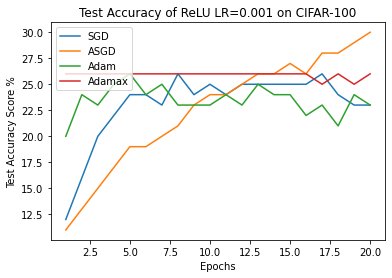

In [43]:
# Plot 1.1: Accuracy ReLU 0.001
plt.plot(cnn_epochs, model_accuracy_results['Net1_1'], label = 'SGD')
plt.plot(cnn_epochs, model_accuracy_results['Net1_2'], label = 'ASGD')
plt.plot(cnn_epochs, model_accuracy_results['Net1_3'], label = 'Adam')
plt.plot(cnn_epochs, model_accuracy_results['Net1_4'], label = 'Adamax')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of ReLU LR=0.001 on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

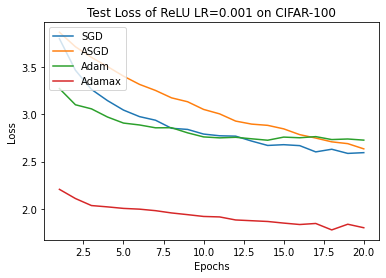

In [44]:
# Plot 1.2: Loss ReLU 0.001
plt.plot(cnn_epochs, model_loss_results['Net1_1'], label = 'SGD')
plt.plot(cnn_epochs, model_loss_results['Net1_2'], label = 'ASGD')
plt.plot(cnn_epochs, model_loss_results['Net1_3'], label = 'Adam')
plt.plot(cnn_epochs, model_loss_results['Net1_4'], label = 'Adamax')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Test Loss of ReLU LR=0.001 on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

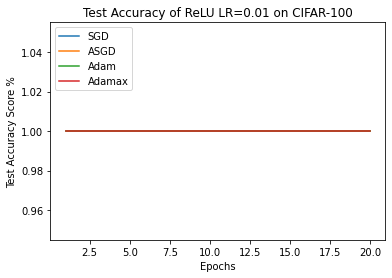

In [19]:
# Plot 2.1: Accuracy ReLU 0.01
plt.plot(cnn_epochs, model_accuracy_results['Net2_1'], label = 'SGD')
plt.plot(cnn_epochs, model_accuracy_results['Net2_2'], label = 'ASGD')
plt.plot(cnn_epochs, model_accuracy_results['Net2_3'], label = 'Adam')
plt.plot(cnn_epochs, model_accuracy_results['Net2_4'], label = 'Adamax')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of ReLU LR=0.01 on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

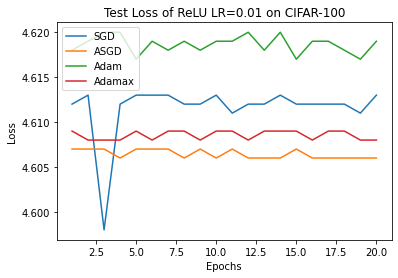

In [20]:
# Plot 2.2: Loss ReLU 0.01
plt.plot(cnn_epochs, model_loss_results['Net2_1'], label = 'SGD')
plt.plot(cnn_epochs, model_loss_results['Net2_2'], label = 'ASGD')
plt.plot(cnn_epochs, model_loss_results['Net2_3'], label = 'Adam')
plt.plot(cnn_epochs, model_loss_results['Net2_4'], label = 'Adamax')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Test Loss of ReLU LR=0.01 on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

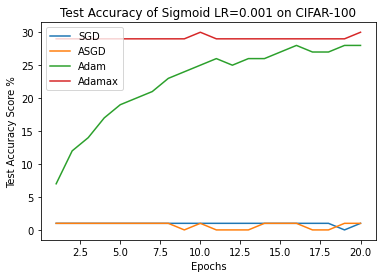

In [21]:
# Plot 3.1: Accuracy Sigmoid 0.001
plt.plot(cnn_epochs, model_accuracy_results['Net3_1'], label = 'SGD')
plt.plot(cnn_epochs, model_accuracy_results['Net3_2'], label = 'ASGD')
plt.plot(cnn_epochs, model_accuracy_results['Net3_3'], label = 'Adam')
plt.plot(cnn_epochs, model_accuracy_results['Net3_4'], label = 'Adamax')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of Sigmoid LR=0.001 on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

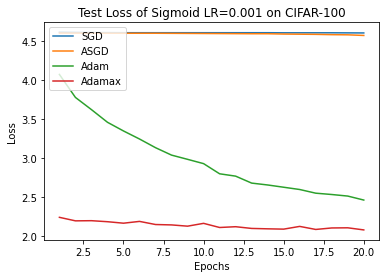

In [22]:
# Plot 3.2: Loss Sigmoid 0.001
plt.plot(cnn_epochs, model_loss_results['Net3_1'], label = 'SGD')
plt.plot(cnn_epochs, model_loss_results['Net3_2'], label = 'ASGD')
plt.plot(cnn_epochs, model_loss_results['Net3_3'], label = 'Adam')
plt.plot(cnn_epochs, model_loss_results['Net3_4'], label = 'Adamax')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Test Loss of Sigmoid LR=0.001 on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

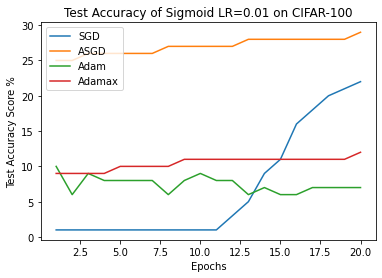

In [23]:
# Plot 4.1: Accuracy Sigmoid 0.01
plt.plot(cnn_epochs, model_accuracy_results['Net4_1'], label = 'SGD')
plt.plot(cnn_epochs, model_accuracy_results['Net4_2'], label = 'ASGD')
plt.plot(cnn_epochs, model_accuracy_results['Net4_3'], label = 'Adam')
plt.plot(cnn_epochs, model_accuracy_results['Net4_4'], label = 'Adamax')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of Sigmoid LR=0.01 on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

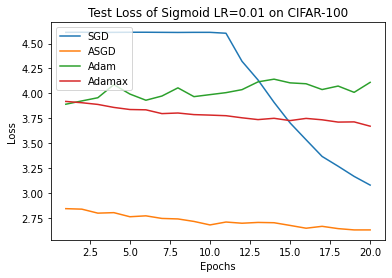

In [24]:
# Plot 4.2: Loss Sigmoid 0.01
plt.plot(cnn_epochs, model_loss_results['Net4_1'], label = 'SGD')
plt.plot(cnn_epochs, model_loss_results['Net4_2'], label = 'ASGD')
plt.plot(cnn_epochs, model_loss_results['Net4_3'], label = 'Adam')
plt.plot(cnn_epochs, model_loss_results['Net4_4'], label = 'Adamax')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Test Loss of Sigmoid LR=0.01 on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

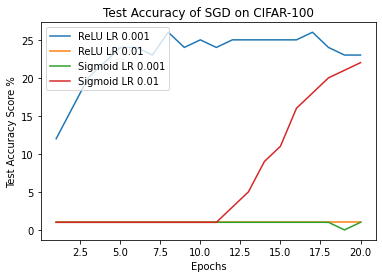

In [25]:
# Plot 5.1: SGD Accuracy
plt.plot(cnn_epochs, model_accuracy_results['Net1_1'], label = 'ReLU LR 0.001')
plt.plot(cnn_epochs, model_accuracy_results['Net2_1'], label = 'ReLU LR 0.01')
plt.plot(cnn_epochs, model_accuracy_results['Net3_1'], label = 'Sigmoid LR 0.001')
plt.plot(cnn_epochs, model_accuracy_results['Net4_1'], label = 'Sigmoid LR 0.01')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of SGD on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

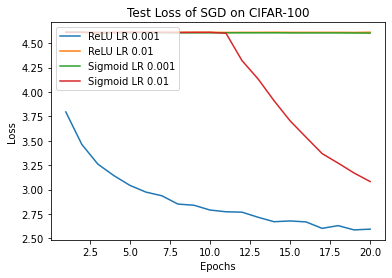

In [26]:
# Plot 5.2: SGD Loss
plt.plot(cnn_epochs, model_loss_results['Net1_1'], label = 'ReLU LR 0.001')
plt.plot(cnn_epochs, model_loss_results['Net2_1'], label = 'ReLU LR 0.01')
plt.plot(cnn_epochs, model_loss_results['Net3_1'], label = 'Sigmoid LR 0.001')
plt.plot(cnn_epochs, model_loss_results['Net4_1'], label = 'Sigmoid LR 0.01')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Test Loss of SGD on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

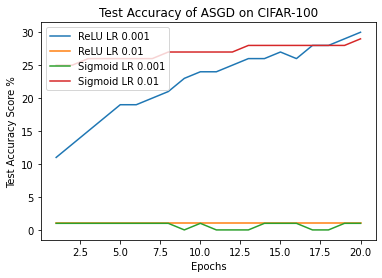

In [45]:
# Plot 6.1: ASGD Accuracy
plt.plot(cnn_epochs, model_accuracy_results['Net1_2'], label = 'ReLU LR 0.001')
plt.plot(cnn_epochs, model_accuracy_results['Net2_2'], label = 'ReLU LR 0.01')
plt.plot(cnn_epochs, model_accuracy_results['Net3_2'], label = 'Sigmoid LR 0.001')
plt.plot(cnn_epochs, model_accuracy_results['Net4_2'], label = 'Sigmoid LR 0.01')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of ASGD on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

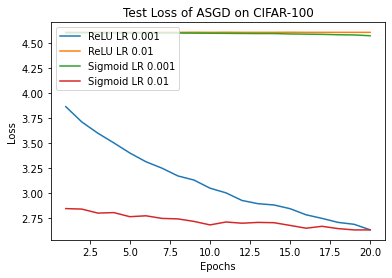

In [46]:
# Plot 6.2: ASGD Loss
plt.plot(cnn_epochs, model_loss_results['Net1_2'], label = 'ReLU LR 0.001')
plt.plot(cnn_epochs, model_loss_results['Net2_2'], label = 'ReLU LR 0.01')
plt.plot(cnn_epochs, model_loss_results['Net3_2'], label = 'Sigmoid LR 0.001')
plt.plot(cnn_epochs, model_loss_results['Net4_2'], label = 'Sigmoid LR 0.01')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Test Loss of ASGD on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

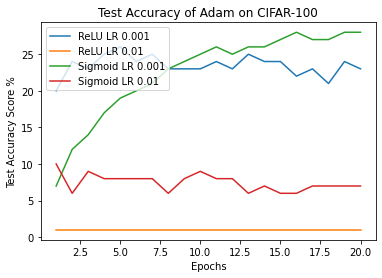

In [47]:
# Plot 7.1: Adam Accuracy
plt.plot(cnn_epochs, model_accuracy_results['Net1_3'], label = 'ReLU LR 0.001')
plt.plot(cnn_epochs, model_accuracy_results['Net2_3'], label = 'ReLU LR 0.01')
plt.plot(cnn_epochs, model_accuracy_results['Net3_3'], label = 'Sigmoid LR 0.001')
plt.plot(cnn_epochs, model_accuracy_results['Net4_3'], label = 'Sigmoid LR 0.01')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of Adam on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

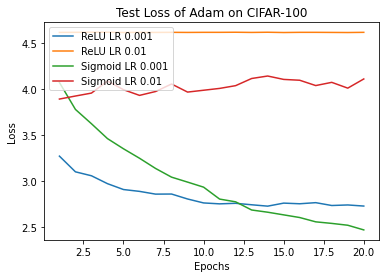

In [48]:
# Plot 7.2: Adam Loss
plt.plot(cnn_epochs, model_loss_results['Net1_3'], label = 'ReLU LR 0.001')
plt.plot(cnn_epochs, model_loss_results['Net2_3'], label = 'ReLU LR 0.01')
plt.plot(cnn_epochs, model_loss_results['Net3_3'], label = 'Sigmoid LR 0.001')
plt.plot(cnn_epochs, model_loss_results['Net4_3'], label = 'Sigmoid LR 0.01')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Test Loss of Adam on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

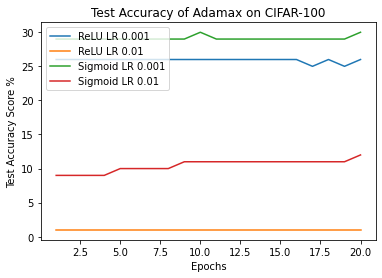

In [49]:
# Plot 8.1: Adamax Accuracy
plt.plot(cnn_epochs, model_accuracy_results['Net1_4'], label = 'ReLU LR 0.001')
plt.plot(cnn_epochs, model_accuracy_results['Net2_4'], label = 'ReLU LR 0.01')
plt.plot(cnn_epochs, model_accuracy_results['Net3_4'], label = 'Sigmoid LR 0.001')
plt.plot(cnn_epochs, model_accuracy_results['Net4_4'], label = 'Sigmoid LR 0.01')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of Adamax on CIFAR-100")
plt.legend(loc="upper left")
plt.show()

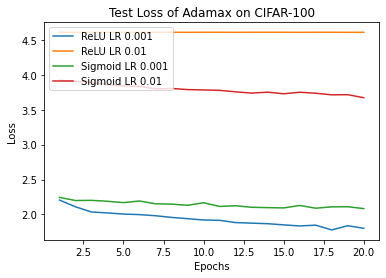

In [50]:
# Plot 8.2: Adamax Loss
plt.plot(cnn_epochs, model_loss_results['Net1_4'], label = 'ReLU LR 0.001')
plt.plot(cnn_epochs, model_loss_results['Net2_4'], label = 'ReLU LR 0.01')
plt.plot(cnn_epochs, model_loss_results['Net3_4'], label = 'Sigmoid LR 0.001')
plt.plot(cnn_epochs, model_loss_results['Net4_4'], label = 'Sigmoid LR 0.01')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Test Loss of Adamax on CIFAR-100")
plt.legend(loc="upper left")
plt.show()